# Discrimination in San Francisco Police Department Traffic Stops
*by Ankush Bharadwaj*

### Question
Is there evidence of discrimination against Black individuals in the outcome of traffic stops conducted by the San Francisco Police Department?

## Access Traffic Stop Data
To access information about traffic stops in San Francisco, [data from The Stanford Open Policing Traffic](https://openpolicing.stanford.edu/) was accessed. [This README file](https://github.com/stanford-policylab/opp/blob/master/data_readme.md) contains information about the features of the data being accessed, and was crucial to look over for me to understand what features are of particular interest. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sf = pd.read_csv('ca_san_francisco_2020_04_01.csv')
sf.head()

/Users/ankushbharadwaj/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


In [3]:
sf.describe()

,lat,lng,subject_age
count,903373.000000,903373.000000,846182.000000
mean,37.762853,-122.429254,37.818577
std,0.036688,0.042173,13.632684
min,36.038676,-123.767429,10.000000
25%,37.740649,-122.448233,27.000000
50%,37.770038,-122.421294,35.000000
75%,37.782610,-122.408425,47.000000
max,39.929646,-113.268151,100.000000


In [4]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   raw_row_number                     905070 non-null  object 
 1   date                               905070 non-null  object 
 2   time                               905035 non-null  object 
 3   location                           905027 non-null  object 
 4   lat                                903373 non-null  float64
 5   lng                                903373 non-null  float64
 6   district                           852883 non-null  object 
 7   subject_age                        846182 non-null  float64
 8   subject_race                       905070 non-null  object 
 9   subject_sex                        905070 non-null  object 
 10  type                               905070 non-null  object 
 11  arrest_made                        9050

In [5]:
sf.drop(['raw_row_number', 'raw_result_of_contact_description', 'raw_search_vehicle_description'], axis = 1, inplace = True)
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              905070 non-null  object 
 1   time              905035 non-null  object 
 2   location          905027 non-null  object 
 3   lat               903373 non-null  float64
 4   lng               903373 non-null  float64
 5   district          852883 non-null  object 
 6   subject_age       846182 non-null  float64
 7   subject_race      905070 non-null  object 
 8   subject_sex       905070 non-null  object 
 9   type              905070 non-null  object 
 10  arrest_made       905070 non-null  bool   
 11  citation_issued   905070 non-null  bool   
 12  warning_issued    905070 non-null  bool   
 13  outcome           889389 non-null  object 
 14  contraband_found  53381 non-null   object 
 15  search_conducted  905070 non-null  bool   
 16  search_vehicle    90

## Prepare Data
The main step of this process is to make sure that all NA values are properly dealt with. For this process, I used a heatmap to visualized which columns have NA values. I then proceeded to drop the two columns with a large amount of NA values, and any rows containing NA values in other columns.

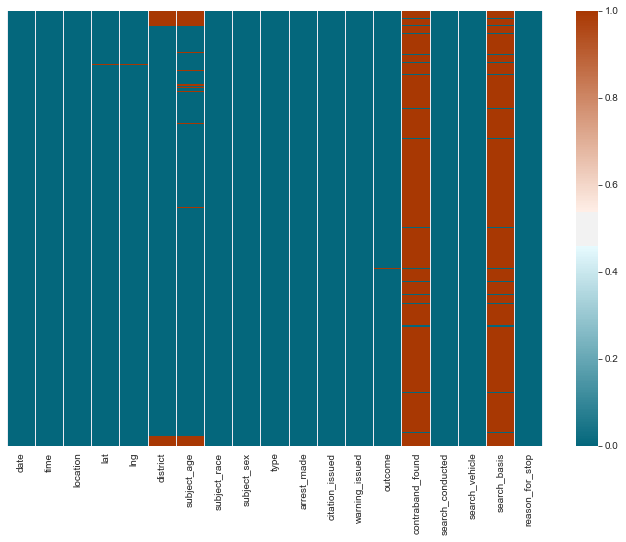

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 

sns.heatmap(sf.isna(), cmap = cmap, yticklabels = False)

In [12]:
sf.drop(['contraband_found', 'search_basis'], axis = 1, inplace = True)
sf['district'].value_counts()

H    117520
I    108213
B    105867
C     95406
D     87702
G     85276
E     73846
A     69677
F     61713
J     46171
K       783
S       514
T       195
Name: district, dtype: int64

In [16]:
sf.dropna(inplace = True, axis = 0)

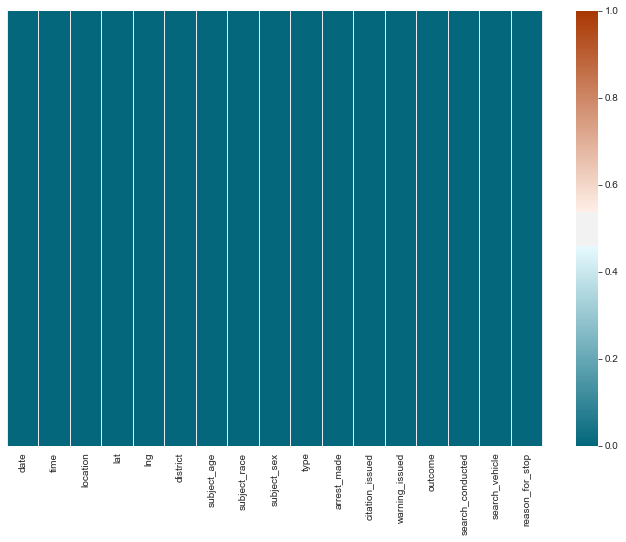

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(sf.isna(), cmap = cmap, vmin = 0, vmax = 1, yticklabels = False)

In [20]:
sf.isna().sum()

date                0
time                0
location            0
lat                 0
lng                 0
district            0
subject_age         0
subject_race        0
subject_sex         0
type                0
arrest_made         0
citation_issued     0
warning_issued      0
outcome             0
search_conducted    0
search_vehicle      0
reason_for_stop     0
dtype: int64

## Exploratory Data Analysis
The next step is to explore the data. First, I looked at the counts of each value in the categorical columns of the dataset. Taking a step back, I noticed that the 'date' column is not in a datetime format, and so this column's data type was changed to datetime. Next, in the value counts, I saw that there were a few values in the 'reason_for_stop' column that could be bucketed into other reasons, and doing this reduced the number of unique reasons for the traffic stop, thereby making the data easier to deal with.  

In [24]:
for column in sf.drop(['lat', 'lng', 'date', 'time', 'subject_age'], axis = 1).columns:
    print(sf[column].value_counts())
    print('\n\n')

FILLMORE/OFARRELL             1246
STOCKTON & SUTTER              877
19TH AVE&WINSTON               850
FULTON/FUNSTON                 677
HYDE/BROADWAY                  676
                              ... 
KEITH AVE. & CARROL ST           1
CAMBRIDGE ST & STONEYBROOK       1
3300 BLK OF ARMY                 1
PIER 94                          1
WEBSTER ST&EDDY ST               1
Name: location, Length: 292069, dtype: int64



H    113429
I    106462
B    102028
C     91990
D     84565
G     84037
E     71279
A     67544
F     60771
J     44594
K       729
S       477
T       186
Name: district, dtype: int64



white                     346232
asian/pacific islander    145494
black                     137614
hispanic                  102967
other                      95784
Name: subject_race, dtype: int64



male      582883
female    245208
Name: subject_sex, dtype: int64



vehicular    828091
Name: type, dtype: int64



False    817120
True      10971
Name: arrest_made, dtype: int

In [37]:
sf['date'] = pd.to_datetime(sf['date'])
sf.dtypes

date                datetime64[ns]
time                        object
location                    object
lat                        float64
lng                        float64
district                    object
subject_age                float64
subject_race                object
subject_sex                 object
type                        object
arrest_made                   bool
citation_issued               bool
warning_issued                bool
outcome                     object
search_conducted              bool
search_vehicle                bool
reason_for_stop             object
dtype: object

In [43]:
sf['reason_for_stop'] = [i.split('|')[-1] for i in sf['reason_for_stop']]
print(sf['reason_for_stop'].value_counts())

Moving Violation                             518944
Mechanical or Non-Moving Violation (V.C.)    304005
MPC Violation                                  2618
DUI Check                                       856
Traffic Collision                               770
BOLO/APB/Warrant                                581
Assistance to Motorist                          315
NA                                                2
Name: reason_for_stop, dtype: int64


In [47]:
sf['reason_for_stop'] = sf['reason_for_stop'].replace('NA', 'Moving Violation')
print(sf['reason_for_stop'].value_counts())

Moving Violation                             518944
Mechanical or Non-Moving Violation (V.C.)    304005
MPC Violation                                  2618
DUI Check                                       856
Traffic Collision                               772
BOLO/APB/Warrant                                581
Assistance to Motorist                          315
Name: reason_for_stop, dtype: int64


At this step of the process, I wanted to visualize the proportion of each outcome of a traffic stop (arrest, citation, or warning) by the race of the individual confronted in the stop. To do this, I put together a short function that uses Pandas' crosstab function to return the proportion for the outcome of a traffic stop for each race. This function was then used to visualize the following in order:
* Proportion of stop outcome by race
* Proportion of whether or not the subject was searched by race
* Proportion of whether or not the subject's vehicle was searched by race
* Proportion of the reason for the traffic stop by race

In [64]:
def proportion_crosstab(orig_df):
    new_df = pd.DataFrame(columns = orig_df.columns, index = orig_df.index)
    for index in orig_df.index:
        total = sum(orig_df.loc[index])
        for column in orig_df.loc[index].index:
            new_df.loc[index][column] = orig_df.loc[index][column]/total
    return(new_df)

outcome,arrest,citation,warning
subject_race,,,
asian/pacific islander,0.00784912,0.787826,0.204325
black,0.0228901,0.567377,0.409733
hispanic,0.0206085,0.699263,0.280129
other,0.00881149,0.77016,0.221029
white,0.010724,0.722611,0.266665


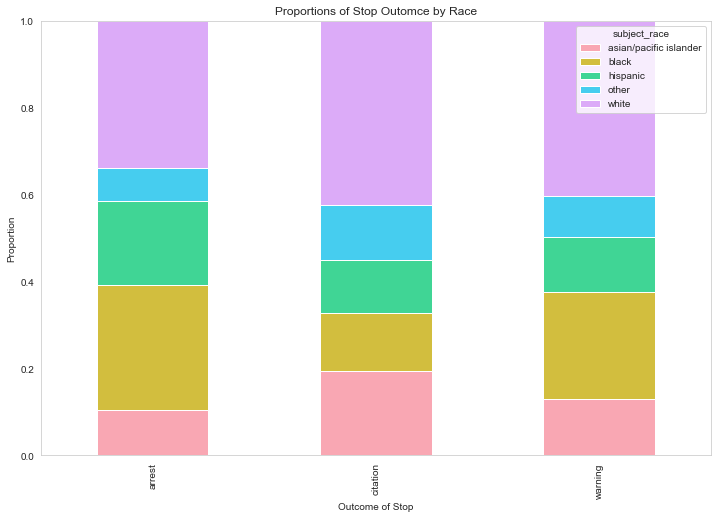

In [71]:
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(5, l = .775))


g = proportion_crosstab(pd.crosstab(sf['outcome'], sf['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Stop Outomce by Race')
plt.show(g)

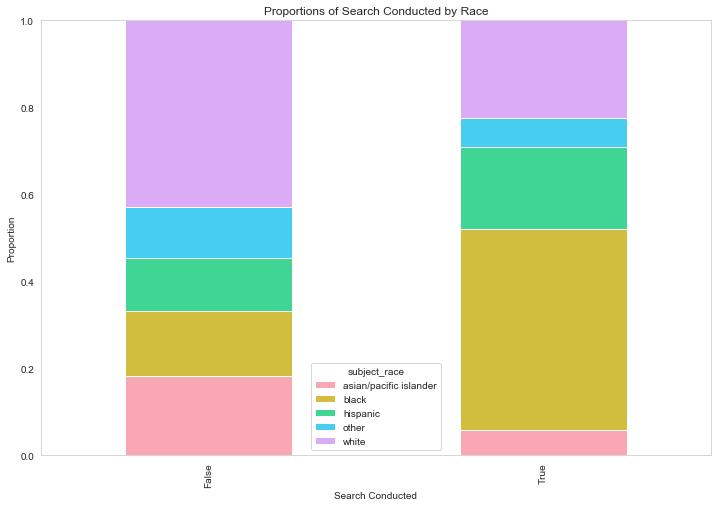

In [74]:
g = proportion_crosstab(pd.crosstab(sf['search_conducted'], sf['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Search Conducted') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Search Conducted by Race')
plt.show(g)

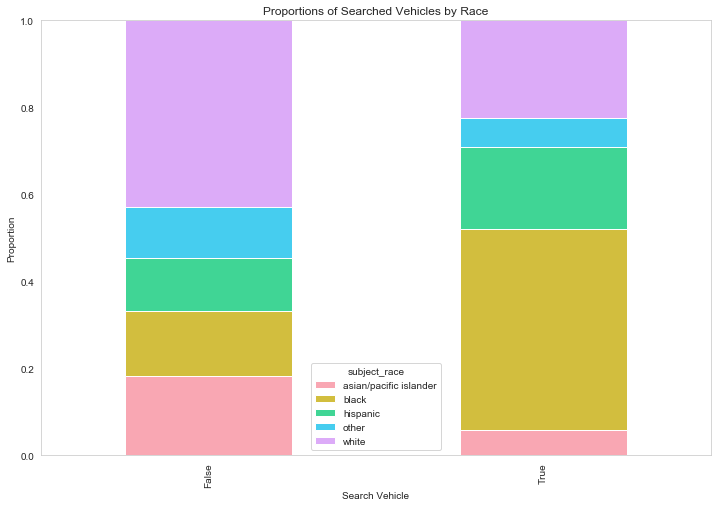

In [75]:
g = proportion_crosstab(pd.crosstab(sf['search_vehicle'], sf['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Search Vehicle') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Searched Vehicles by Race')
plt.show(g)

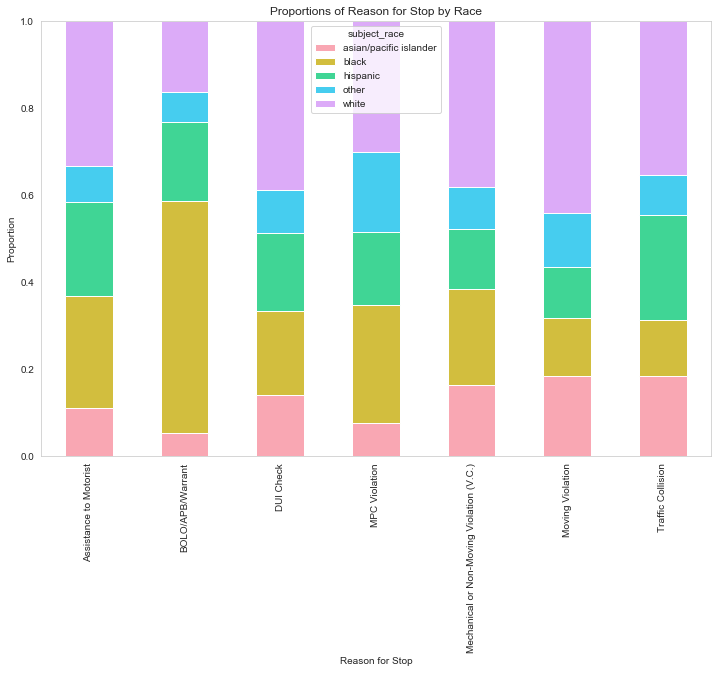

In [76]:
g = proportion_crosstab(pd.crosstab(sf['reason_for_stop'], sf['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Reason for Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Reason for Stop by Race')
plt.show(g)

From here, for each reason for stop, the proportion of the outcomes of the traffic stop for each race, when stopped by a police officer for each specific reason, was visualized. 

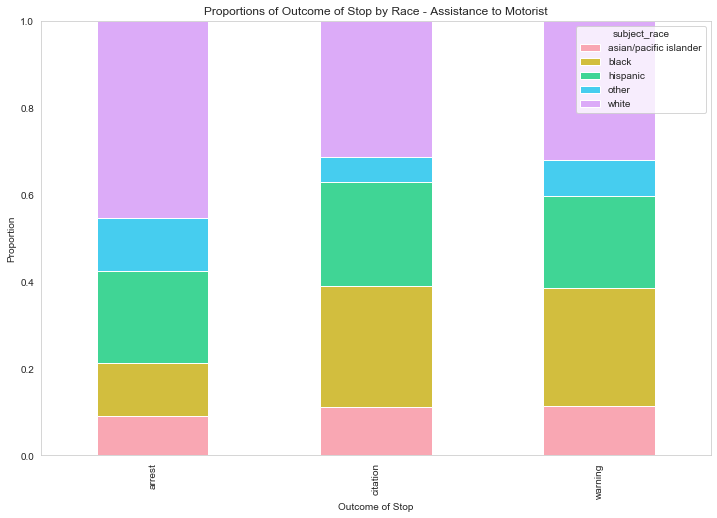

In [79]:
g = proportion_crosstab(pd.crosstab(sf[sf.reason_for_stop == 'Assistance to Motorist']['outcome'], 
                                    sf[sf.reason_for_stop == 'Assistance to Motorist']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Outcome of Stop by Race - Assistance to Motorist')
plt.show(g)

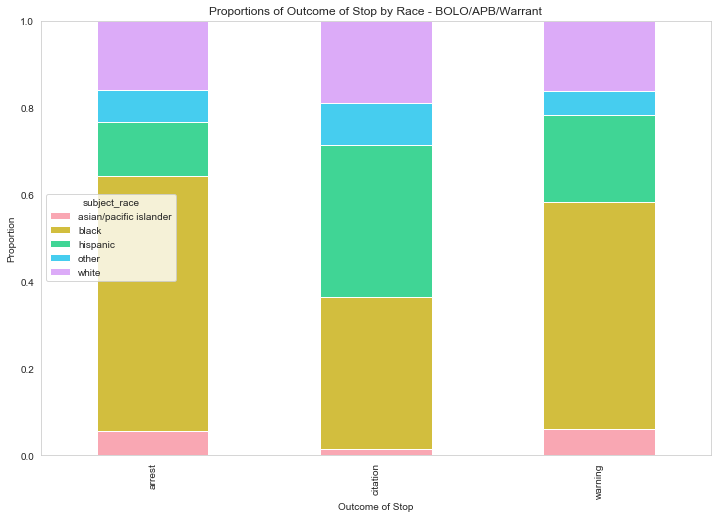

In [80]:
g = proportion_crosstab(pd.crosstab(sf[sf.reason_for_stop == 'BOLO/APB/Warrant']['outcome'], 
                                    sf[sf.reason_for_stop == 'BOLO/APB/Warrant']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Outcome of Stop by Race - BOLO/APB/Warrant')
plt.show(g)

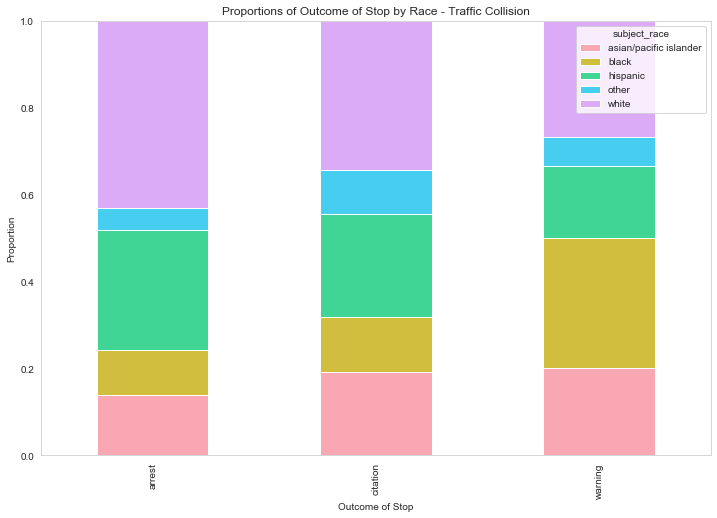

In [81]:
g = proportion_crosstab(pd.crosstab(sf[sf.reason_for_stop == 'Traffic Collision']['outcome'], 
                                    sf[sf.reason_for_stop == 'Traffic Collision']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Outcome of Stop by Race - Traffic Collision')
plt.show(g)

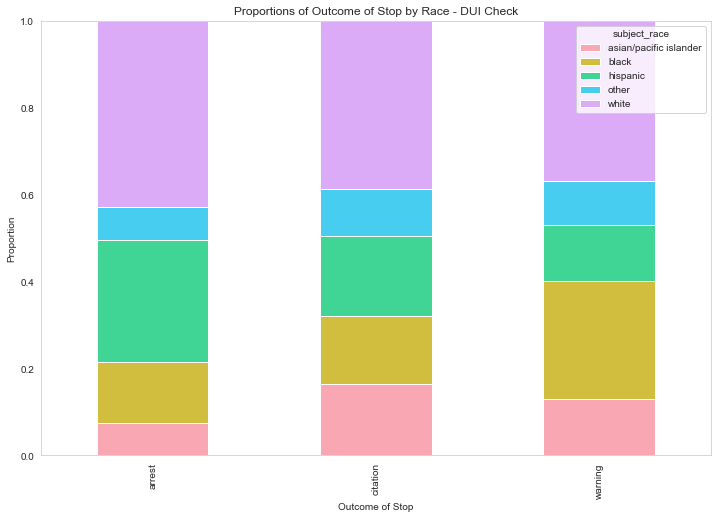

In [82]:
g = proportion_crosstab(pd.crosstab(sf[sf.reason_for_stop == 'DUI Check']['outcome'], 
                                    sf[sf.reason_for_stop == 'DUI Check']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Outcome of Stop by Race - DUI Check')
plt.show(g)

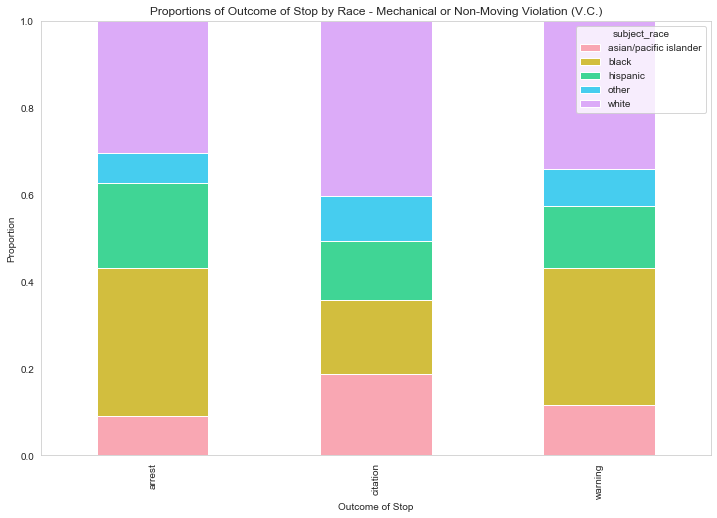

In [83]:
g = proportion_crosstab(pd.crosstab(sf[sf.reason_for_stop == 'Mechanical or Non-Moving Violation (V.C.)']['outcome'], 
                                    sf[sf.reason_for_stop == 'Mechanical or Non-Moving Violation (V.C.)']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Outcome of Stop by Race - Mechanical or Non-Moving Violation (V.C.)')
plt.show(g)

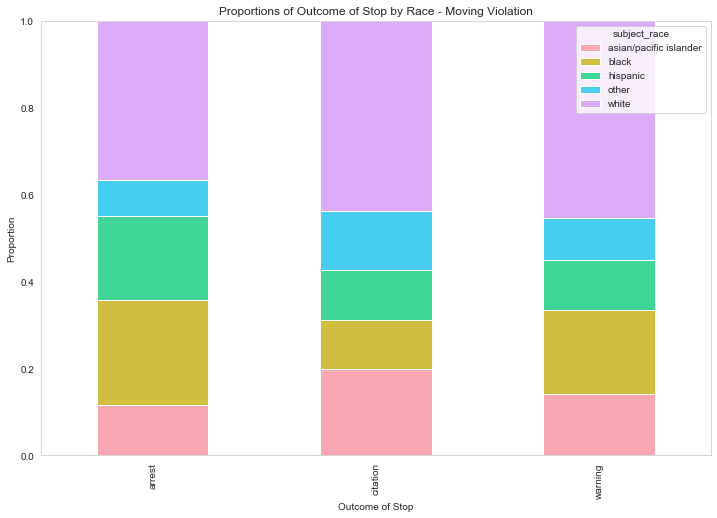

In [84]:
g = proportion_crosstab(pd.crosstab(sf[sf.reason_for_stop == 'Moving Violation']['outcome'], 
                                    sf[sf.reason_for_stop == 'Moving Violation']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Outcome of Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Outcome of Stop by Race - Moving Violation')
plt.show(g)

I selected only the data that resulted in an arrest, and displayed the proportion of racial groups that were arrested for each reason of a traffic stop. Doing this allowed me to scan for instances where for the same reason of stop, certain groups were arrested at higher rates than other groups. 

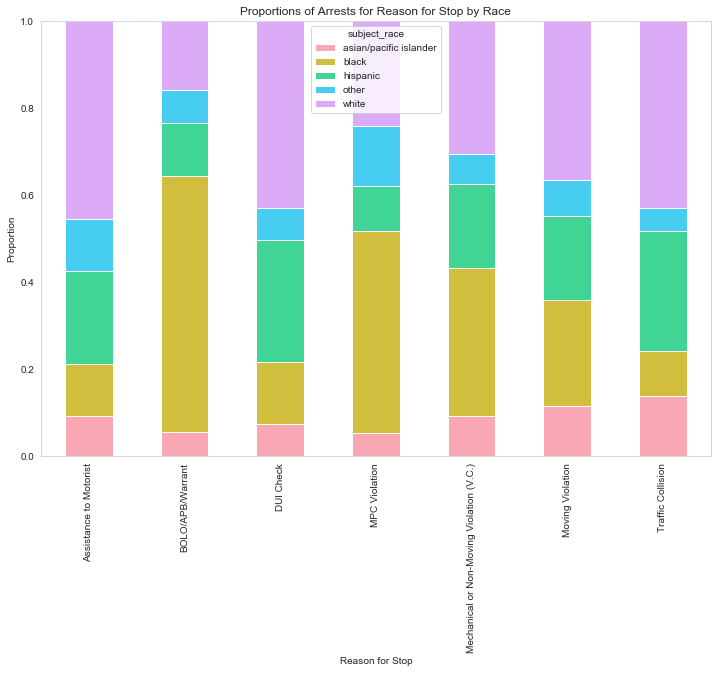

In [87]:
g = proportion_crosstab(pd.crosstab(sf[sf.outcome == 'arrest']['reason_for_stop'], sf[sf.outcome == 'arrest']['subject_race'])).plot(kind = 'bar', stacked = True, grid = False, figsize = (12,8))
plt.xlabel('Reason for Stop') 
plt.ylabel('Proportion')
plt.ylim(0,1.0) 
plt.title('Proportions of Arrests for Reason for Stop by Race')
plt.show(g)

## Hypothesis Testing
In this step, I definitively answer the question regarding bias and discrimination in traffic stops by the San Francisco PD. 

To do this, I first used a two-proportion Z-test to compare the proportion of Black people whose traffic stops resulted in an arrest to the proportion of people from all other races whose traffic stops resulted in an arrest. Since the p-value was much lower than the alpha threshold I set of .01, the null hypothesis, that the proportion of arrests resulting from traffic stops for Black people is equal to or less than the proportion of arrests resulting from traffic stops for people of all other races, was rejected. Therefore, I concluded that across the entire dataset, Black people are arrested at higher rates compared to people of all other races when halted for a traffic stop. 

However, I was concerned that Black people were being stopped for different reasons than people of other races. Maybe this would explain why Black people's traffic stops ended with arrests more often. To test this hypothesis, I once again repeated the two-proportion Z-test, but this time, by comparing the proportion of arrests made for each race for each reason of traffic stop. In this set of tests, I found that Black people are indeed arrested at higher rates than people of other races for the following: Mechanical or Non-Moving Violation, Moving Violation, MPC Violation, and BOLO/APB/Warrant. However, when considering other reasons for the traffic stop, including DUI Check, Assistance to Motorist, and Traffic Collision, the null hypothesis could not be rejected, leading to the conclusion that Black people are arrested at the conclusion of such traffic stops at a proportion equal to or less than the rate of arrests for individuals of other races. 

In [126]:
import math
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

print('Null hypothesis: Proportion of Arrests of Black People <= Proportion of Arrests of People from All Other Races\n')
print('Alternative hypothesis: Proportion of Arrests of Black People > Proportion of Arrests of People from All Other Races\n')

b_tot = (pd.crosstab(sf['outcome'], sf['subject_race']))['black'].sum()
other_tot = (pd.crosstab(sf['outcome'], sf['subject_race'])).drop(['black'], axis = 1).sum().sum()

b_arrest = (pd.crosstab(sf['outcome'], sf['subject_race']))['black'].loc['arrest']
other_arrest = (pd.crosstab(sf['outcome'], sf['subject_race'])).drop(['black'], axis = 1).loc['arrest'].sum()

alpha = .01

count = np.array([b_arrest, other_arrest])
nobs = np.array([b_tot, other_tot])

z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')

if p_value < alpha:
    print('P-value: {}\nZ-score: {}\nNull hypothesis rejected.'.format(p_value, z_score))
else:
    print('P-value: {}\nZ-score: {}\nFail to reject null hypothesis.'.format(p_value, z_score))

Null hypothesis: Proportion of Arrests of Black People <= Proportion of Arrests of People from All Other Races

Alternative hypothesis: Proportion of Arrests of Black People > Proportion of Arrests of People from All Other Races

P-value: 1.687110777266889e-257
Z-score: 34.25748553276136
Null hypothesis rejected.


In [133]:
for reason in sf['reason_for_stop'].unique():
    working_df = sf[sf['reason_for_stop'] == reason]
    print('\n{}: '.format(reason))
    
    b_tot = (pd.crosstab(working_df['outcome'], working_df['subject_race']))['black'].sum()
    other_tot = (pd.crosstab(working_df['outcome'], working_df['subject_race'])).drop(['black'], axis = 1).sum().sum()

    b_arrest = (pd.crosstab(working_df['outcome'], working_df['subject_race']))['black'].loc['arrest']
    other_arrest = (pd.crosstab(working_df['outcome'], working_df['subject_race'])).drop(['black'], axis = 1).loc['arrest'].sum()

    alpha = .01

    count = np.array([b_arrest, other_arrest])
    nobs = np.array([b_tot, other_tot])

    z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')
    
    if p_value < alpha:
        print('P-value: {}\nZ-score: {}\nNull hypothesis rejected.'.format(p_value, z_score))
    else:
        print('P-value: {}\nZ-score: {}\nFAIL to reject null hypothesis.'.format(p_value, z_score))
    


Mechanical or Non-Moving Violation (V.C.): 
P-value: 4.433136732665594e-81
Z-score: 19.03430389920887
Null hypothesis rejected.

Moving Violation: 
P-value: 1.8717973662904982e-141
Z-score: 25.293736247238808
Null hypothesis rejected.

MPC Violation: 
P-value: 0.0004159565918195329
Z-score: 3.3419524245552052
Null hypothesis rejected.

DUI Check: 
P-value: 0.942110745888359
Z-score: -1.5727422686331103
FAIL to reject null hypothesis.

BOLO/APB/Warrant: 
P-value: 0.0095219002322627
Z-score: 2.3446724708087965
Null hypothesis rejected.

Assistance to Motorist: 
P-value: 0.9705055471686366
Z-score: -1.888276013973595
FAIL to reject null hypothesis.

Traffic Collision: 
P-value: 0.8179670492969369
Z-score: -0.9076448290649286
FAIL to reject null hypothesis.


## Gentrification and Traffic Stops

This final portion of the project has little to no relevance to the initial question I posed, and is instead just something I was curious about. To that extent, I was wondering whether or not the number of traffic stops per year would show a relation with gentrification in San Francisco. Specifically, as the San Francisco County grows more gentrified, how does the number of traffic stops change? 

To answer this question, I used the [CensusData package](https://jtleider.github.io/censusdata/example1.html) to access the U.S. Census Bureau’s API in Python and pull data from the American Community Survey. This [link](https://www.census.gov/programs-surveys/acs/guidance/which-data-tool/table-ids-explained.html) contains some useful information I used to help find relevant tables. Specifically, I used number of people with a Bachelors, Graduate, or Professional Degree and Aggregate Household Income in San Francisco County as metrics for measuring gentrification. At the end of this step, I compared the number of individuals with such the aforementioned higher educational degrees each year and the aggregate household income for individuals in San Francisco County each year with the number of traffic stops recorded in the Stanford Open Policing Project dataset each year.

In [313]:
import censusdata

print((censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)['California']).params()[0][1])
print(censusdata.geographies(censusdata.censusgeo([('state', '06'), ('county', '*')]), 'acs5', 2015)['San Francisco County, California'].params()[-1][1])

06
075


In [283]:
censusdata.search('acs5', 2015, 'label', 'income')[3750:]

[('B17020A_005E',
  'B17020A.  POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE)',
  'Income in the past 12 months below poverty level:!!12 to 17 years'),
 ('B17020A_005M',
  'B17020A.  POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE)',
  'Margin of Error for!!Income in the past 12 months below poverty level:!!12 to 17 years'),
 ('B17020A_006E',
  'B17020A.  POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE)',
  'Income in the past 12 months below poverty level:!!18 to 59 years'),
 ('B17020A_006M',
  'B17020A.  POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE)',
  'Margin of Error for!!Income in the past 12 months below poverty level:!!18 to 59 years'),
 ('B17020A_007E',
  'B17020A.  POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE)',
  'Income in the past 12 months below poverty level:!!60 to 74 years'),
 ('B17020A_007M',
  'B17020A.  POVERTY STATUS IN THE PAST 12 MONTHS BY AGE (WHITE ALONE)',
  'Margin of Error for!!Income in the past 12 months

In [284]:
censusdata.printtable(censusdata.censustable('acs5', 2009, 'B19062'))
censusdata.printtable(censusdata.censustable('acs5', 2010, 'B19062'))
censusdata.printtable(censusdata.censustable('acs5', 2011, 'B19062'))
censusdata.printtable(censusdata.censustable('acs5', 2012, 'B19062'))
censusdata.printtable(censusdata.censustable('acs5', 2013, 'B19062'))
censusdata.printtable(censusdata.censustable('acs5', 2014, 'B19062'))
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B19062'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19062_001E  | B19062.  Aggregate Wage or Sal | Aggregate wage or salary income in the past 12 months (i | int  
-------------------------------------------------------------------------------------------------------------------
Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19062_001E  | B19062.  Aggregate Wage or Sal | Aggregate wage or salary income in the past 12 months (i | int  
-------------------------------------------------------------------------------------------------------------------
Variable     | Table                          | Label                               

In [285]:
def get_aggregate_household_income(year):
    value = int(censusdata.download('acs5', year, censusdata.censusgeo([('state', '06'),
                                                                        ('county', '075')]),
                                    list((censusdata.censustable('acs5', year, 'B19062')).keys()))['B19062_001E'])
    return(value)

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

agg_income = [get_aggregate_household_income(year) for year in years]
agg_income

[24968267200,
 26385317200,
 27386485400,
 28137211800,
 29302611600,
 30723868200,
 32667226700]

In [293]:
censusdata.printtable(censusdata.censustable('acs5', 2009, 'B15001'))
censusdata.printtable(censusdata.censustable('acs5', 2010, 'B15001'))
censusdata.printtable(censusdata.censustable('acs5', 2011, 'B15001'))
censusdata.printtable(censusdata.censustable('acs5', 2012, 'B15001'))
censusdata.printtable(censusdata.censustable('acs5', 2013, 'B15001'))
censusdata.printtable(censusdata.censustable('acs5', 2014, 'B15001'))
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B15001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15001_001E  | B15001.  SEX BY AGE BY EDUCATI | Total:                                                   | int  
B15001_002E  | B15001.  SEX BY AGE BY EDUCATI | Male:                                                    | int  
B15001_003E  | B15001.  SEX BY AGE BY EDUCATI | !! Male: 18 to 24 years:                                 | int  
B15001_004E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Less than 9th grade          | int  
B15001_005E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: 9th to 12th grade, no diplom | int  
B15001_006E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: High school graduate, GED, o | int  
B15001_007E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Some college, no 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15001_001E  | B15001.  SEX BY AGE BY EDUCATI | Total:                                                   | int  
B15001_002E  | B15001.  SEX BY AGE BY EDUCATI | Male:                                                    | int  
B15001_003E  | B15001.  SEX BY AGE BY EDUCATI | !! Male: 18 to 24 years:                                 | int  
B15001_004E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Less than 9th grade          | int  
B15001_005E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: 9th to 12th grade, no diplom | int  
B15001_006E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: High school graduate, GED, o | int  
B15001_007E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Some college, no 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15001_001E  | B15001.  SEX BY AGE BY EDUCATI | Total:                                                   | int  
B15001_002E  | B15001.  SEX BY AGE BY EDUCATI | Male:                                                    | int  
B15001_003E  | B15001.  SEX BY AGE BY EDUCATI | !! Male: 18 to 24 years:                                 | int  
B15001_004E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Less than 9th grade          | int  
B15001_005E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: 9th to 12th grade, no diplom | int  
B15001_006E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: High school graduate, GED, o | int  
B15001_007E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Some college, no 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15001_001E  | B15001.  SEX BY AGE BY EDUCATI | Total:                                                   | int  
B15001_002E  | B15001.  SEX BY AGE BY EDUCATI | Male:                                                    | int  
B15001_003E  | B15001.  SEX BY AGE BY EDUCATI | !! Male: 18 to 24 years:                                 | int  
B15001_004E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Less than 9th grade          | int  
B15001_005E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: 9th to 12th grade, no diplom | int  
B15001_006E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: High school graduate (includ | int  
B15001_007E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Some college, no 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15001_001E  | B15001.  SEX BY AGE BY EDUCATI | Total:                                                   | int  
B15001_002E  | B15001.  SEX BY AGE BY EDUCATI | Male:                                                    | int  
B15001_003E  | B15001.  SEX BY AGE BY EDUCATI | !! Male: 18 to 24 years:                                 | int  
B15001_004E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Less than 9th grade          | int  
B15001_005E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: 9th to 12th grade, no diplom | int  
B15001_006E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: High school graduate (includ | int  
B15001_007E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Some college, no 

In [317]:
def get_education_level(year):
    scope = censusdata.download('acs5', year, censusdata.censusgeo([('state', '06'), ('county', '075')]),
                                list((censusdata.censustable('acs5', year, 'B15001')).keys()))
    hs_tot = int(scope['B15001_006E'])+int(scope['B15001_014E'])+int(scope['B15001_022E'])+int(scope['B15001_030E'])+int(scope['B15001_038E'])+int(scope['B15001_047E'])+int(scope['B15001_055E'])+int(scope['B15001_063E'])+int(scope['B15001_071E'])+int(scope['B15001_079E'])
    asc_tot = int(scope['B15001_008E'])+int(scope['B15001_016E'])+int(scope['B15001_024E'])+int(scope['B15001_032E'])+int(scope['B15001_040E'])+int(scope['B15001_049E'])+int(scope['B15001_057E'])+int(scope['B15001_065E'])+int(scope['B15001_073E'])+int(scope['B15001_081E'])
    bs_tot = int(scope['B15001_009E'])+int(scope['B15001_017E'])+int(scope['B15001_025E'])+int(scope['B15001_033E'])+int(scope['B15001_041E'])+int(scope['B15001_050E'])+int(scope['B15001_058E'])+int(scope['B15001_066E'])+int(scope['B15001_074E'])+int(scope['B15001_082E'])
    grad_tot = int(scope['B15001_010E'])+int(scope['B15001_018E'])+int(scope['B15001_026E'])+int(scope['B15001_034E'])+int(scope['B15001_042E'])+int(scope['B15001_051E'])+int(scope['B15001_059E'])+int(scope['B15001_067E'])+int(scope['B15001_075E'])+int(scope['B15001_083E'])
    
    final_dict = {'total': int(scope['B15001_001E']),
                 'total high school or equiv': hs_tot,
                 'associates total': asc_tot,
                 'bachelors total': bs_tot,
                 'graduate or professional total': grad_tot}
    return(final_dict)

years = [2009, 2010, 2011, 2012, 2014, 2015]

education_lvls = [get_education_level(year) for year in years]
education_lvls

[{'total': 682912,
  'total high school or equiv': 103693,
  'associates total': 36843,
  'bachelors total': 212082,
  'graduate or professional total': 121724},
 {'total': 682638,
  'total high school or equiv': 102869,
  'associates total': 36975,
  'bachelors total': 210537,
  'graduate or professional total': 121322},
 {'total': 690689,
  'total high school or equiv': 103547,
  'associates total': 36690,
  'bachelors total': 211725,
  'graduate or professional total': 124454},
 {'total': 699402,
  'total high school or equiv': 100714,
  'associates total': 36626,
  'bachelors total': 216694,
  'graduate or professional total': 127699},
 {'total': 717884,
  'total high school or equiv': 98142,
  'associates total': 38240,
  'bachelors total': 225848,
  'graduate or professional total': 135564},
 {'total': 728059,
  'total high school or equiv': 96355,
  'associates total': 39565,
  'bachelors total': 233380,
  'graduate or professional total': 141350}]

In [320]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

agg_income_series = pd.Series(data = agg_income, index = years)
agg_income_series

2009    24968267200
2010    26385317200
2011    27386485400
2012    28137211800
2013    29302611600
2014    30723868200
2015    32667226700
dtype: int64

In [321]:
education_attainment_df = pd.DataFrame(index = [2009, 2010, 2011, 2012, 2014, 2015], data = education_lvls)
education_attainment_df

,total,total high school or equiv,associates total,bachelors total,graduate or professional total
2009,682912,103693,36843,212082,121724
2010,682638,102869,36975,210537,121322
2011,690689,103547,36690,211725,124454
2012,699402,100714,36626,216694,127699
2014,717884,98142,38240,225848,135564
2015,728059,96355,39565,233380,141350


Text(0.5, 1.0, 'Aggregate Household Income in San Francisco County by Year')

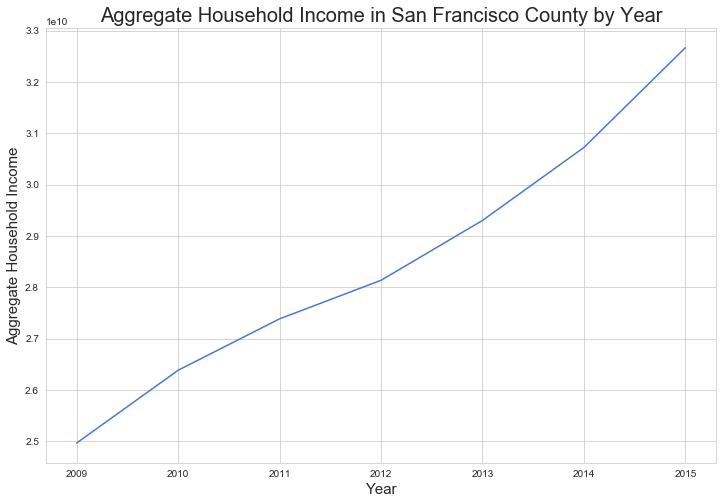

In [334]:
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

plt.figure(figsize = (12,8))
sns.lineplot(x = agg_income_series.index, y = agg_income_series)
plt.xlabel('Year', size = 15)
plt.ylabel('Aggregate Household Income', size = 15)
plt.title('Aggregate Household Income in San Francisco County by Year', size = 20)

Text(0.5, 1.0, 'Proportion of People with Bachelors Degree in San Francisco County by Year')

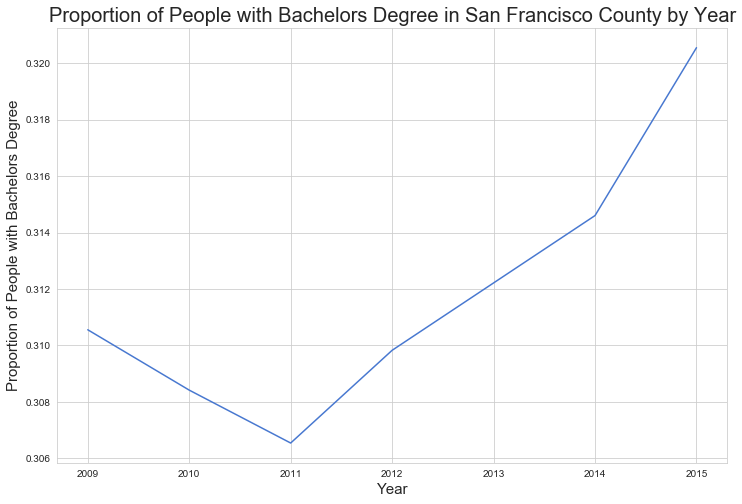

In [337]:
plt.figure(figsize = (12,8))
sns.lineplot(x = education_attainment_df.index, y = education_attainment_df['bachelors total']/education_attainment_df['total'])
plt.xlabel('Year', size = 15)
plt.ylabel('Proportion of People with Bachelors Degree', size = 15)
plt.title('Proportion of People with Bachelors Degree in San Francisco County by Year', size = 20)

Text(0.5, 1.0, 'Proportion of People with Graduate or Professional Degree in San Francisco County by Year')

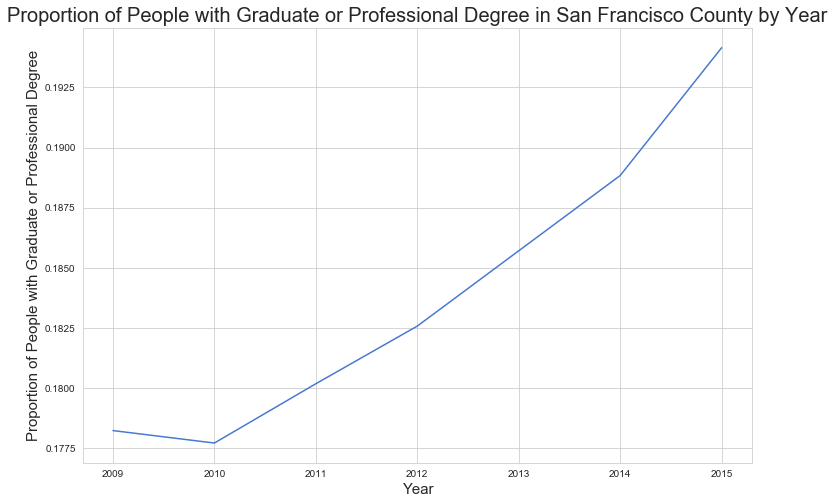

In [338]:
plt.figure(figsize = (12,8))
sns.lineplot(x = education_attainment_df.index, y = education_attainment_df['graduate or professional total']/education_attainment_df['total'])
plt.xlabel('Year', size = 15)
plt.ylabel('Proportion of People with Graduate or Professional Degree', size = 15)
plt.title('Proportion of People with Graduate or Professional Degree in San Francisco County by Year', size = 20)

how do overall numbers of stops change in specific districts?

In [348]:
sf.set_index(['date'], inplace = True)
sf

,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,search_vehicle,reason_for_stop
date,,,,,,,,,,,,,,,,
2007-01-01,10:00:00,26TH & MINNESOTA,37.75,-122.39,C,56.0,white,male,vehicular,False,True,False,citation,False,False,Mechanical or Non-Moving Violation (V.C.)
2007-01-01,10:17:00,EMBARCADERO & HOWARDA ON,37.79,-122.39,B,32.0,white,male,vehicular,False,True,False,citation,False,False,Moving Violation
2007-01-01,10:25:00,1700 JUDAH,37.76,-122.48,I,57.0,asian/pacific islander,female,vehicular,False,True,False,citation,False,False,Moving Violation
2007-01-01,10:28:00,COLUMBUS/VALLEJO,37.80,-122.41,A,31.0,hispanic,male,vehicular,False,False,True,warning,False,False,Moving Violation
2007-01-01,10:35:00,FOLSOM & MOSS,37.78,-122.41,J,37.0,hispanic,female,vehicular,False,True,False,citation,False,False,Moving Violation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,09:24:00,JONES & MCALLISTER,37.78,-122.41,J,47.0,hispanic,female,vehicular,False,True,False,citation,False,False,Moving Violation
2016-06-30,09:34:00,GOLDEN GATE & HYDE,37.78,-122.42,J,55.0,white,female,vehicular,False,True,False,citation,False,False,Moving Violation
2016-06-30,09:50:00,11TH ST. & MARKET ST.,37.78,-122.42,J,36.0,asian/pacific islander,male,vehicular,False,True,False,citation,False,False,Moving Violation


In [349]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015]
num_stops = [len(sf.loc[str(year)]) for year in years]

num_stops_by_year = pd.Series(index = years, data = num_stops)
num_stops_by_year

2009    106561
2010    101683
2011     97045
2012     80486
2013     72664
2014     39131
2015     84514
dtype: int64

In [366]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

ed_data = min_max_scaler.fit_transform(np.array(education_attainment_df['graduate or professional total']/education_attainment_df['total']).reshape(-1,1))
agg_data = min_max_scaler.fit_transform(np.array(agg_income_series).reshape(-1,1))
stops_data = min_max_scaler.fit_transform(np.array(num_stops_by_year).reshape(-1,1))

ed_data = [i[0] for i in ed_data.tolist()]
agg_data = [i[0] for i in agg_data.tolist()]
stops_data = [i[0] for i in stops_data.tolist()]

Text(0.5, 1.0, 'Relation between Gentrification and Number of Traffic Stops')

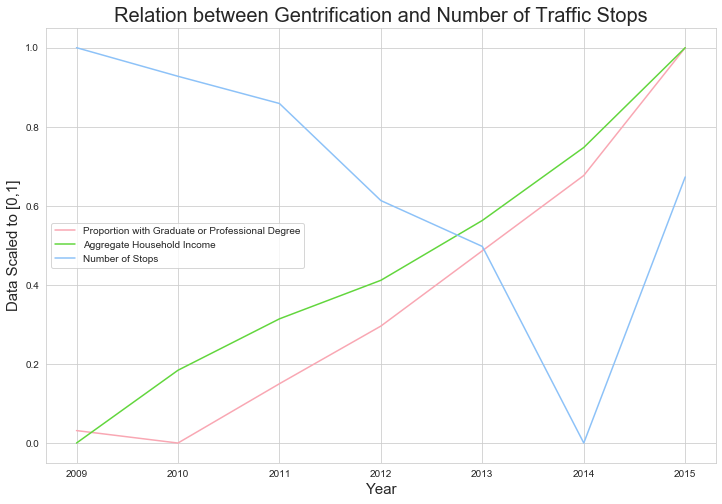

In [372]:
sns.set_palette(sns.husl_palette(3, l = .775))

plt.figure(figsize = (12,8))
sns.lineplot(x = education_attainment_df.index, y = (ed_data), label = 'Proportion with Graduate or Professional Degree')
sns.lineplot(x = agg_income_series.index, y = (agg_data), label = 'Aggregate Household Income')
sns.lineplot(x = num_stops_by_year.index, y = (stops_data), label = 'Number of Stops')
plt.legend()
plt.xlabel('Year', size = 15)
plt.ylabel('Data Scaled to [0,1]', size = 15)
plt.title('Relation between Gentrification and Number of Traffic Stops', size = 20)

As you can see from the above graph, it appears that generally, San Francisco County has been growing more gentrified according to the two metrics I selected. Furthermore, the number of traffic stops appears to be dropping over time as well, apart from a hard spike in 2015.

In [383]:
row_2013 = (education_attainment_df.loc[2012]+education_attainment_df.loc[2014])/2
row_2013 = [int(i) for i in row_2013]
ed_2013_df = pd.DataFrame(index = [2013], columns = education_attainment_df.columns)
ed_2013_df.loc[2013] = row_2013

education_attainment_df = pd.concat([education_attainment_df.iloc[:4], ed_2013_df, education_attainment_df.iloc[4:]])
education_attainment_df

,total,total high school or equiv,associates total,bachelors total,graduate or professional total
2009,682912,103693,36843,212082,121724
2010,682638,102869,36975,210537,121322
2011,690689,103547,36690,211725,124454
2012,699402,100714,36626,216694,127699
2013,708643,99428,37433,221271,131631
2014,717884,98142,38240,225848,135564
2015,728059,96355,39565,233380,141350


In [386]:
overall_df = education_attainment_df
overall_df['number of stops'] = num_stops_by_year
overall_df['aggregate household income'] = agg_income_series
overall_df

,total,total high school or equiv,associates total,bachelors total,graduate or professional total,number of stops,aggregate household income
2009,682912,103693,36843,212082,121724,106561,24968267200
2010,682638,102869,36975,210537,121322,101683,26385317200
2011,690689,103547,36690,211725,124454,97045,27386485400
2012,699402,100714,36626,216694,127699,80486,28137211800
2013,708643,99428,37433,221271,131631,72664,29302611600
2014,717884,98142,38240,225848,135564,39131,30723868200
2015,728059,96355,39565,233380,141350,84514,32667226700


In [391]:
overall_df = overall_df.astype({'total': int,
                               'total high school or equiv': int,
                               'associates total': int,
                               'bachelors total': int,
                               'graduate or professional total': int})
overall_df.dtypes

total                             int64
total high school or equiv        int64
associates total                  int64
bachelors total                   int64
graduate or professional total    int64
number of stops                   int64
aggregate household income        int64
dtype: object

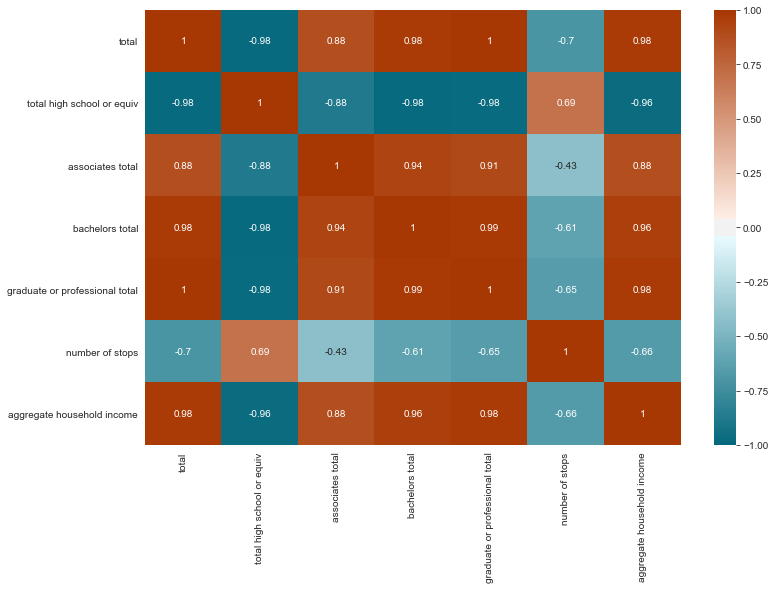

In [393]:
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, as_cmap = True) 
plt.figure(figsize = (12,8))

sns.heatmap(overall_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap)

As the heatmap above illustrates, the number of traffic stops in a year has a weak, negative correlation with the number of total individuals with Bachelors, Graduate, or Professional degrees and aggregate household income. This indicates that an increase in the number of highly-educated people in an area and an increase in the household income of an area correlates to a decrease in the number of traffic stops, within the context of San Francisco County. 